In [22]:
import numpy as np
import matplotlib.pyplot as plt
import finesse

Modulation index of 0.3<br>
Arm cavities are added to the existing PRMI config.

In [31]:
iligo=finesse.Model()
iligo.parse("""
#Laser
l laser P=1
s s0 laser.p1 eom.p1 L=1

#EOM
mod eom  f=45497355 midx=0.3 order=1                      #Phase modulating the laser @ 454497355Hz
s s2 eom.p2 Fi.p1 L=1

#Faraday isolator
dbs Fi
s s3 Fi.p3 prmar.p1 L=0

#PRM

m prmar R=0 T=0.99996 L=4e-5 Rc=[11.009, 11.009]
s sprmarpr prmar.p2 PRM.p1 L=0.0737 nr=1.4496 
m PRM R=0.941986192469247  T=0.05800530753075306 L=8.5e-06
s sPRBS PRM.p2 BS.p1 L=6.6938325585217555                                 #Initially set as zero

#Beam Splitter
bs BS R=0.5 T=0.4999625 L=3.75e-05 alpha=45 
s sBSAR1 BS.p3 BSAR1.p1 L=0.0687 nr=1.4496
bs BSAR1 R=5e-5 T=0.99995 L=0 phi=0 alpha=-29.195
s sBSAR2 BS.p4 BSAR2.p1 L=0.0687 nr=1.4496
bs BSAR2 R=5e-5 T=0.99995 L=0 phi=0 alpha=29.195


#ITMx
s michx BSAR1.p3 ITMxAR.p1 L=4.5582022909315505                           #Initially set as zero
m ITMxAR R=0 T=0.99998 L=2e-5
s sITMxARITM ITMxAR.p2 ITMx.p1 L=0.2 nr=1.4496
m ITMx R=0.9859625  T=0.014 L=3.75e-05 Rc=[-1934.0, -1934.0]

#ETMx
s LX ITMx.p2 ETMx.p1 L=3994.4692
m ETMx T=5e-6 L=3.75e-5 Rc=[2245,2245]
s sExExAR ETMx.p2 ETMxAR.p1 L=0.2 nr=1.44963098985906
m ETMxAR R=0 L=0.0005 

#ITMy
s michy BS.p2 ITMyAR.p1 L=4.4417977090684495                              #Initially set as zero
m ITMyAR R=0 T=0.99998 L=2e-5
s sITMyARITM ITMyAR.p2 ITMy.p1 L=0.2 nr=1.4496
m ITMy R=0.9859625  T=0.014 L=3.75e-05 Rc=[-1934.0, -1934.0]

#ETMy
s LY ITMy.p2 ETMy.p1 L=3994.4692
m ETMy T=5e-6 L=3.75e-5 Rc=[2245,2245]
s sEyEyAR ETMy.p2 ETMyAR.p1 L=0.2 nr=1.44963098985906
m ETMyAR R=0 L=0.0005

#Photo detectors

pd AS_dc BS.p4.o
pd POP_dc PRM.p2.o
pd REFL_dc PRM.p1.o
pd ArmTrans_dc ITMy.p2.o
pd in PRM.p1.i

#Amplitude detectors

ad BS_f0 BS.p1.o f=0
ad BS_f2 BS.p1.o f=45497355
ad AS_f0 BSAR2.p3.o f=0
ad AS_f2 BS.p4.o f=45497355
ad POP_f0 PRM.p2.o f=0
ad POP_f2 PRM.p2.o f=45497355

ad Arm_field_c ITMy.p2.o f=0

pd1 REFLf1I PRM.p1.o f=45497355 phase=301.26126126126127
pd1 REFLf1Q PRM.p1.o f=45497355 phase=391.26126126126127

pd1 ASf1I BS.p4.o f=45497355 phase=210.8108108108108
pd1 ASf1Q BS.p4.o f=45497355 phase=300.81081081081084

pd1 POPf1I PRM.p2.o f=45497355 phase=121.08108108108108
pd1 POPf1Q PRM.p2.o f=45497355 phase=211.0810810810811

#Sweeping the ITMy mirror

xaxis(ITMy.phi,lin,-50,50,10000)
""")

Text(0, 0.5, 'POP_DC (in $W$)')

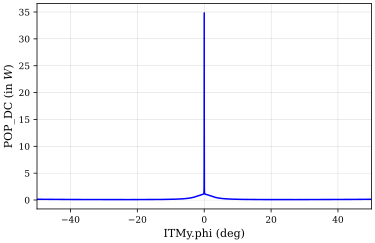

In [32]:
out=iligo.run()
POP_dc=[]
for i in range(10000):
    POP_dc.append(abs(out["POP_dc"][i]))
phi=np.linspace(-50,50,10000)
plt.plot(phi,POP_dc)
plt.xlabel("ITMy.phi (deg)")
plt.ylabel("POP_DC (in $W$)")

In [30]:
print("Power recycling gain:",max(POP_dc))

Power recycling gain: 34.83094483160906
